In [7]:
import yfinance as yf
import matplotlib.pyplot as plt



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


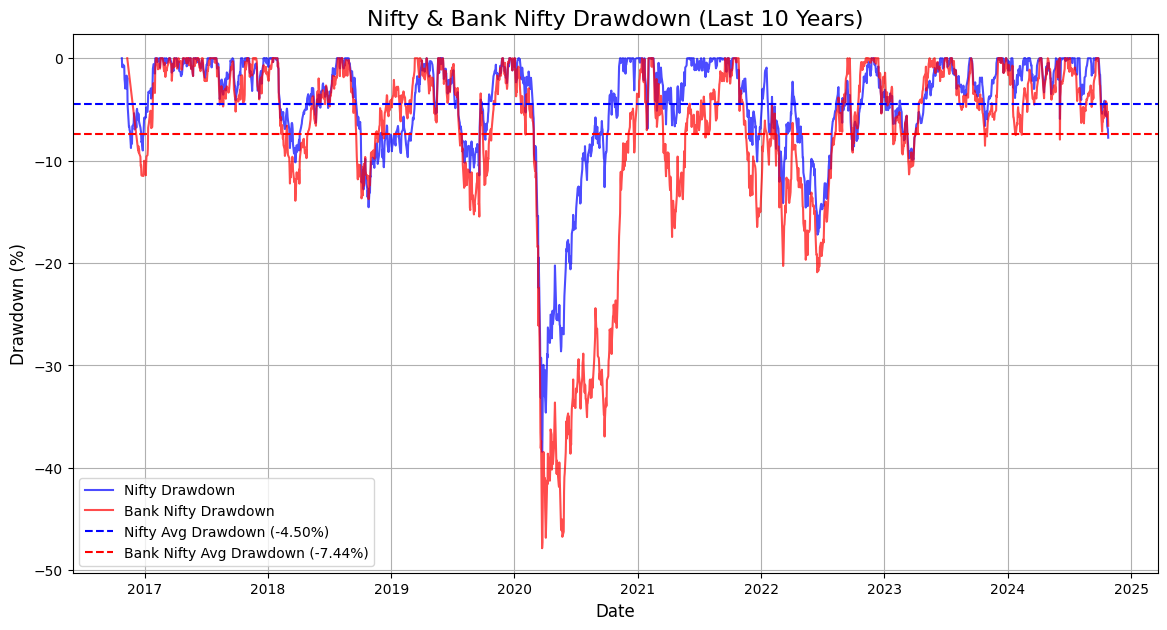

In [10]:
nifty = yf.download("^NSEI", period="8y")  # Nifty 50 Index
banknifty = yf.download("^NSEBANK", period="8y")  # Bank Nifty Index

def calculate_drawdown(data):
    running_max = data['Close'].cummax() 
    drawdown = (data['Close'] - running_max) / running_max  
    return drawdown


nifty['Drawdown'] = calculate_drawdown(nifty)
banknifty['Drawdown'] = calculate_drawdown(banknifty)
average_drawdown_nifty = nifty['Drawdown'].mean() * 100  
average_drawdown_banknifty = banknifty['Drawdown'].mean() * 100 


plt.figure(figsize=(14, 7))
plt.plot(nifty.index, nifty['Drawdown'] * 100, label="Nifty Drawdown", color="blue", alpha=0.7)
plt.plot(banknifty.index, banknifty['Drawdown'] * 100, label="Bank Nifty Drawdown", color="red", alpha=0.7)

# Plot 
plt.axhline(average_drawdown_nifty, color='blue', linestyle='--', label=f'Nifty Avg Drawdown ({average_drawdown_nifty:.2f}%)')
plt.axhline(average_drawdown_banknifty, color='red', linestyle='--', label=f'Bank Nifty Avg Drawdown ({average_drawdown_banknifty:.2f}%)')

plt.title("Nifty & Bank Nifty Drawdown (Last 10 Years)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Drawdown (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


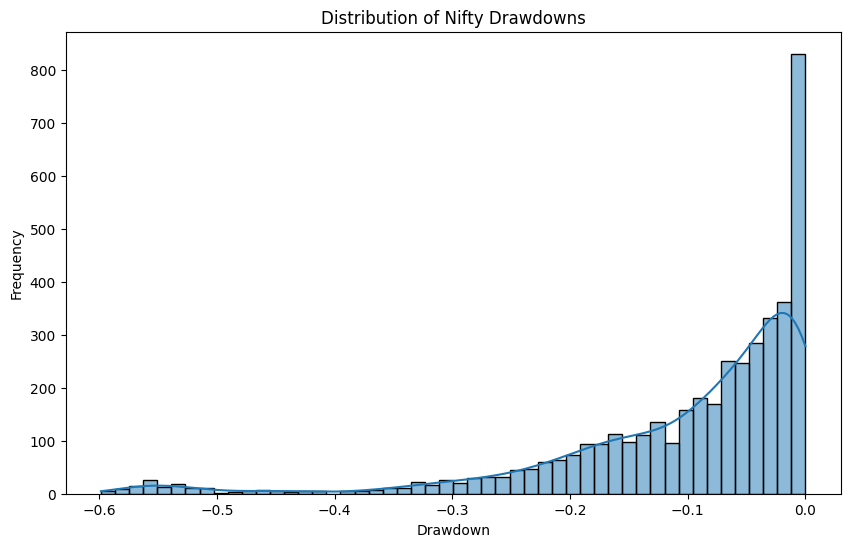

In [12]:
nifty = yf.download('^NSEI', start='2000-01-01')['Adj Close']

returns = nifty.pct_change()
cumulative_returns = (1 + returns).cumprod()
running_max = cumulative_returns.cummax()

drawdown = (cumulative_returns - running_max) / running_max

plt.figure(figsize=(10, 6))
sns.histplot(drawdown.dropna(), bins=50, kde=True)
plt.title('Distribution of Nifty Drawdowns')
plt.xlabel('Drawdown')
plt.ylabel('Frequency')
plt.show()

[*********************100%%**********************]  1 of 1 completed


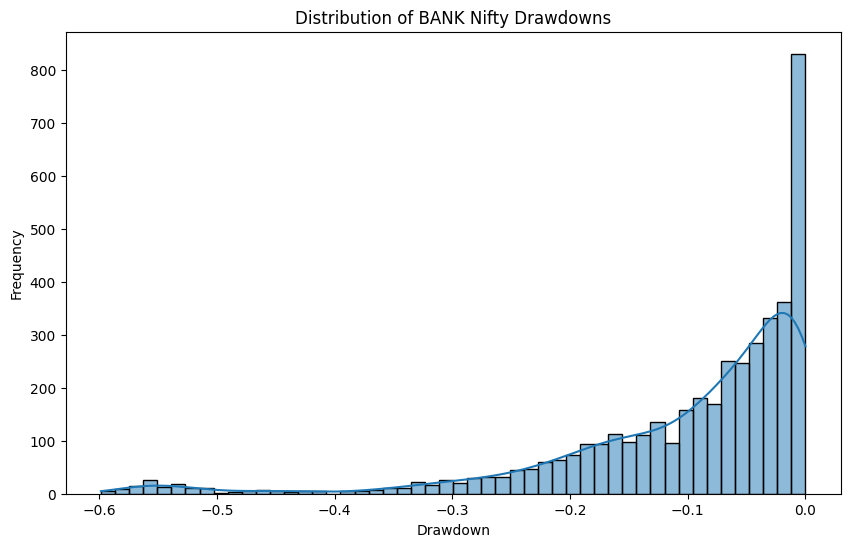

In [13]:
niftybank = yf.download('^NSEBANK', start='2000-01-01')['Adj Close']

returns = nifty.pct_change()
cumulative_returns = (1 + returns).cumprod()
running_max = cumulative_returns.cummax()

drawdown = (cumulative_returns - running_max) / running_max

plt.figure(figsize=(10, 6))
sns.histplot(drawdown.dropna(), bins=50, kde=True)
plt.title('Distribution of BANK Nifty Drawdowns')
plt.xlabel('Drawdown')
plt.ylabel('Frequency')
plt.show()